In [1]:
%load_ext autoreload
%autoreload 2

from src.models.vae import VAE
from src.data.dataset import SliderDataset

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

In [85]:
n_mels = 128
frames = 5
n_fft = 1024
hop_length = 512
power = 2.0


ds = SliderDataset("../data/raw/dev_data/dev_data/slider/test/",
                n_mels=n_mels,
                frames=frames,
                n_fft=n_fft,
                hop_length=hop_length,
                power=power,
                # transform=ToTensor1ch(device=device),
                # normalize=normalize,
)

input, target = ds[0]
input.shape, target.shape
input[0, :4]

tensor([0.7154, 0.9348, 0.9066, 0.9570])

In [86]:
from src.models.lstm_vae  import LSTMVAE
from src.data.data_module import SliderDataModule
model = LSTMVAE(i_dim=128, h_dim=1000, z_dim=256)
dm = SliderDataModule(
    data_dir="../data/raw",
    batch_size=64,
    num_workers=4
)
early_stopping = pl.callbacks.EarlyStopping('val/loss')
callbacks = [early_stopping]
trainer = pl.Trainer(accelerator="gpu", devices=1,
                    callbacks=callbacks, max_epochs=10,
                    log_every_n_steps=1)
trainer.fit(model, datamodule=dm)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 5.0 M 
1 | decoder | Decoder | 164 K 
------------------------------------
5.2 M     Trainable params
0         Non-trainable params
5.2 M     Total params
20.790    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [87]:
from torchmetrics.functional import mean_squared_error
model.eval()
for batch in dm.train_dataloader():
    with torch.no_grad():
        input, target = batch
        batch_size = input.shape[0]

        input, target = input.to(model.device), target.to(model.device)
        recon, _ = model(input)
        
        # recon =  recon.reshape(batch_size, -1)
        # target = target.reshape(batch_size, -1)
    print(mean_squared_error(recon, target))
    break

tensor(0.0030)


<AxesSubplot:>

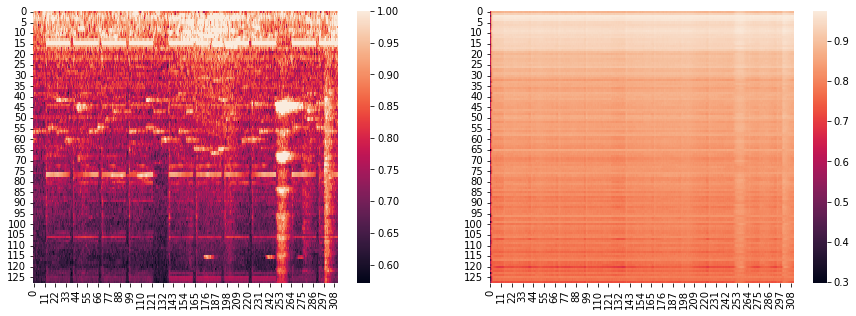

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

idx = 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.heatmap(recon[idx].cpu().T, ax=axs[1])
sns.heatmap(target[idx].cpu().T, ax=axs[0])


<AxesSubplot:ylabel='Count'>

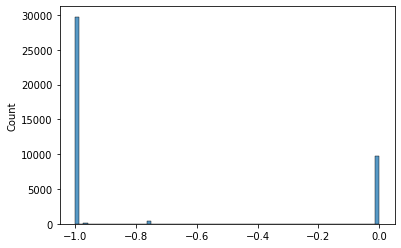

In [76]:
sns.histplot(recon[0].flatten().cpu())